In [1]:
!mkdir -p /scratch/sagarsj42

import os
os.chdir('/scratch/sagarsj42')

In [2]:
!wget https://research.google.com/youtube8m/csv/2/vocabulary.csv
!mv vocabulary.csv yt8m-vocab.csv

--2023-06-03 14:30:53--  https://research.google.com/youtube8m/csv/2/vocabulary.csv
Resolving research.google.com (research.google.com)... 142.250.195.238, 2404:6800:4007:828::200e
Connecting to research.google.com (research.google.com)|142.250.195.238|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3598745 (3.4M) [text/csv]
Saving to: ‘vocabulary.csv’

vocabulary.csv      100%[===================>]   3.43M  17.1MB/s    in 0.2s    

2023-06-03 14:30:53 (17.1 MB/s) - ‘vocabulary.csv’ saved [3598745/3598745]



In [3]:
import requests

import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

2023-06-03 14:31:09.148472: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-03 14:31:13.897436: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
vocab_file = 'yt8m-vocab.csv'

In [5]:
sample_path = './yt8m/train/train1052.tfrecord'
for raw_rec in tf.data.TFRecordDataset(sample_path):
    example = tf.train.Example()
    example.ParseFromString(raw_rec.numpy())
    print(type(example))
    print(type(example.features.feature['id']))
    for k in example.features.feature.keys():
        print(k)
    print(example.features.feature['id'])
    print(type(example.features.feature['id'].bytes_list.value[0].decode()))
    break

<class 'tensorflow.core.example.example_pb2.Example'>
<class 'tensorflow.core.example.feature_pb2.Feature'>
mean_rgb
mean_audio
id
labels
bytes_list {
  value: "1Tq8"
}

<class 'str'>


2023-06-03 01:03:50.115086: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-06-03 01:03:50.169121: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1]
	 [[{{node Placeholder/_0}}]]


In [5]:
data_id = '1Tq8'
prefix = data_id[:2]
url = f'https://data.yt8m.org/2/j/i/{prefix}/{data_id}.js'
print(url)

response = requests.get(url, verify=False)
vid = response.text.split(',')[1].split('"')[1]
yt_url = f'https://www.youtube.com/watch?v={vid}'
print(yt_url)

vid

https://data.yt8m.org/2/j/i/1T/1Tq8.js


/home2/sagarsj42/miniconda3/envs/video/lib/python3.9/site-packages/urllib3/connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'data.yt8m.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


https://www.youtube.com/watch?v=RxRfnNgycp4


'RxRfnNgycp4'

In [7]:
for raw_rec in tf.data.TFRecordDataset(sample_path):
    example = tf.train.Example()
    example.ParseFromString(raw_rec.numpy())
    print(type(example.features.feature['labels']))
    print(example.features.feature['labels'])
    print(type(example.features.feature['labels'].int64_list.value))
    for val in example.features.feature['labels'].int64_list.value:
        print(type(val))
    labels = list()
    for val in example.features.feature['labels'].int64_list.value:
        labels.append(val)
    print(labels)
    break

<class 'tensorflow.core.example.feature_pb2.Feature'>
int64_list {
  value: 482
  value: 501
  value: 958
  value: 1290
}

<class 'google._upb._message.RepeatedScalarContainer'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
[482, 501, 958, 1290]


2023-06-03 01:03:50.368189: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1]
	 [[{{node Placeholder/_0}}]]


In [8]:
for raw_rec in tf.data.TFRecordDataset(sample_path):
    example = tf.train.Example()
    example.ParseFromString(raw_rec.numpy())
    print(type(example.features.feature['mean_rgb']))
    print(type(example.features.feature['mean_rgb'].float_list.value))
    rgb_vals = list()
    for val in example.features.feature['mean_rgb'].float_list.value:
        rgb_vals.append(val)
    print(len(rgb_vals), rgb_vals[-10:])
    break

<class 'tensorflow.core.example.feature_pb2.Feature'>
<class 'google._upb._message.RepeatedScalarContainer'>
1024 [-0.19924631714820862, -0.500056803226471, -0.048710376024246216, 0.39196935296058655, -0.1297038346529007, -0.13854044675827026, 0.110871322453022, 0.16206087172031403, -0.20729860663414001, -0.13257965445518494]


2023-06-03 01:03:50.400633: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1]
	 [[{{node Placeholder/_0}}]]


In [9]:
for raw_rec in tf.data.TFRecordDataset(sample_path):
    example = tf.train.Example()
    example.ParseFromString(raw_rec.numpy())
    print(type(example.features.feature['mean_audio']))
    audio_vals = list()
    for val in example.features.feature['mean_audio'].float_list.value:
        audio_vals.append(val)
    print(len(audio_vals), audio_vals[-10:])
    break

<class 'tensorflow.core.example.feature_pb2.Feature'>
128 [0.29921120405197144, -0.6083966493606567, -0.2041613608598709, 0.2045183777809143, 0.07238766551017761, 0.051420342177152634, -0.7426188588142395, 0.03850531205534935, 0.5567275285720825, -0.5397430658340454]


2023-06-03 01:03:50.429031: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1]
	 [[{{node Placeholder/_0}}]]


In [6]:
vocab_df = pd.read_csv(vocab_file)

print(vocab_df.info())

vocab_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3862 entries, 0 to 3861
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Index             3862 non-null   int64 
 1   TrainVideoCount   3862 non-null   int64 
 2   KnowledgeGraphId  3862 non-null   object
 3   Name              3806 non-null   object
 4   WikiUrl           3806 non-null   object
 5   Vertical1         3862 non-null   object
 6   Vertical2         584 non-null    object
 7   Vertical3         32 non-null     object
 8   WikiDescription   3806 non-null   object
dtypes: int64(2), object(7)
memory usage: 271.7+ KB
None


,Index,TrainVideoCount,KnowledgeGraphId,Name,WikiUrl,Vertical1,Vertical2,Vertical3,WikiDescription
0,0,788288,/m/03bt1gh,Game,https://en.wikipedia.org/wiki/Game,Games,NaN,NaN,"A game is structured form of play, usually und..."
1,1,539945,/m/01mw1,Video game,https://en.wikipedia.org/wiki/Video_game,Games,NaN,NaN,A video game is an electronic game that involv...
2,2,415890,/m/07yv9,Vehicle,https://en.wikipedia.org/wiki/Vehicle,Autos & Vehicles,NaN,NaN,A vehicle is a mobile machine that transports ...
3,3,378135,/m/01jddz,Concert,https://en.wikipedia.org/wiki/Concert,Arts & Entertainment,NaN,NaN,A concert is a live music performance in front...
4,4,286532,/m/09jwl,Musician,https://en.wikipedia.org/wiki/Musician,Arts & Entertainment,NaN,NaN,A musician is a person who plays a musical ins...


In [7]:
vocab_df['KnowledgeGraphId'].nunique()

3862

In [8]:
vocab_df['Name'].nunique()

3806

In [9]:
n_v1s = vocab_df['Vertical1'].nunique()

n_v1s

25

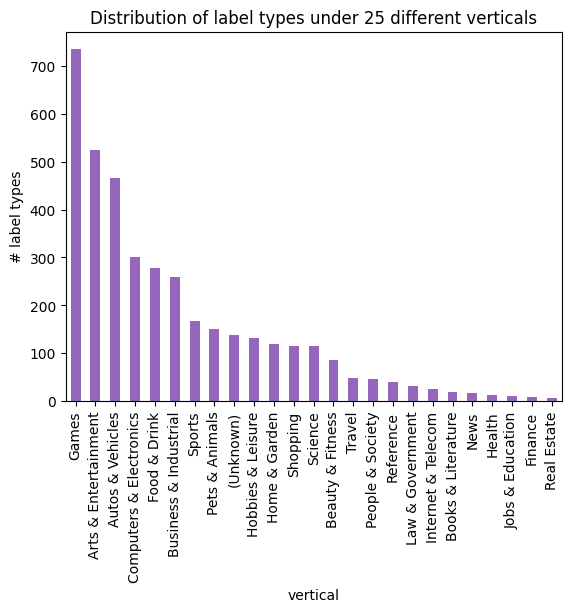

In [10]:
vocab_df['Vertical1'].value_counts().plot(kind='bar', 
                title=f'Distribution of label types under {n_v1s} different verticals', 
                xlabel='vertical', ylabel='# label types', 
                rot=90, color='tab:purple')
plt.show()

In [11]:
total_sum = 0
v1_counts = dict()
for v1, v1_df in vocab_df.groupby('Vertical1'):
    curr_sum = v1_df['TrainVideoCount'].sum()
    total_sum += curr_sum
    v1_counts[v1] = curr_sum

v1_counts, total_sum

({'(Unknown)': 43066,
  'Arts & Entertainment': 3274869,
  'Autos & Vehicles': 1420359,
  'Beauty & Fitness': 306797,
  'Books & Literature': 15716,
  'Business & Industrial': 517551,
  'Computers & Electronics': 538753,
  'Finance': 6061,
  'Food & Drink': 683466,
  'Games': 2425392,
  'Health': 8647,
  'Hobbies & Leisure': 328863,
  'Home & Garden': 130246,
  'Internet & Telecom': 156620,
  'Jobs & Education': 24486,
  'Law & Government': 51804,
  'News': 31971,
  'People & Society': 26678,
  'Pets & Animals': 390905,
  'Real Estate': 15233,
  'Reference': 30861,
  'Science': 121668,
  'Shopping': 206947,
  'Sports': 858623,
  'Travel': 96038},
 11711620)

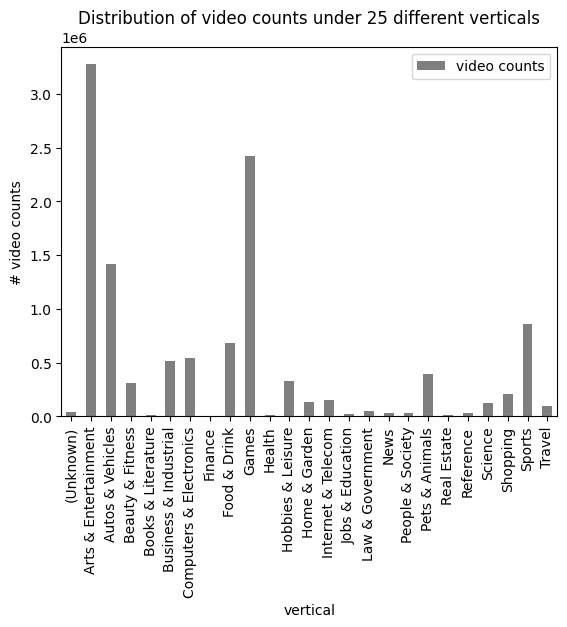

In [12]:
counts_df = pd.DataFrame({
    'vertical': [k for k in v1_counts],
    'video counts': [v1_counts[k] for k in v1_counts]})

counts_df.plot(kind='bar', x='vertical', y='video counts',
               title=f'Distribution of video counts under {n_v1s} different verticals', 
               xlabel='vertical', ylabel='# video counts', 
               rot=90, color='tab:gray')
plt.show()

In [13]:
len(vocab_df[vocab_df['Vertical1'] == 'Arts & Entertainment']['Name'].values)

525

In [14]:
vocab_df[vocab_df['Name'] == 'Music video']

,Index,TrainVideoCount,KnowledgeGraphId,Name,WikiUrl,Vertical1,Vertical2,Vertical3,WikiDescription
14,14,116098,/m/0mdxd,Music video,https://en.wikipedia.org/wiki/Music_video,Arts & Entertainment,NaN,NaN,A music video is a short film integrating a so...


In [20]:
vocab_df[vocab_df['Vertical1'] == 'Arts & Entertainment'].nlargest(120, 'TrainVideoCount')

,Index,TrainVideoCount,KnowledgeGraphId,Name,WikiUrl,Vertical1,Vertical2,Vertical3,WikiDescription
3,3,378135,/m/01jddz,Concert,https://en.wikipedia.org/wiki/Concert,Arts & Entertainment,NaN,NaN,A concert is a live music performance in front...
4,4,286532,/m/09jwl,Musician,https://en.wikipedia.org/wiki/Musician,Arts & Entertainment,NaN,NaN,A musician is a person who plays a musical ins...
5,5,236948,/m/0215n,Cartoon,https://en.wikipedia.org/wiki/Cartoon,Arts & Entertainment,NaN,NaN,A cartoon is a type of two-dimensional illustr...
6,6,203343,/m/01350r,Performance art,https://en.wikipedia.org/wiki/Performance_art,Arts & Entertainment,NaN,NaN,Performance art is a performance presented to ...
8,8,181579,/m/026bk,Dance,https://en.wikipedia.org/wiki/Dance,Arts & Entertainment,NaN,NaN,Dance is a performance art form consisting of ...
...,...,...,...,...,...,...,...,...,...
666,662,1924,/m/056gfb3,Hetalia: Axis Powers,https://en.wikipedia.org/wiki/Hetalia:_Axis_Po...,Arts & Entertainment,NaN,NaN,"Hetalia: Axis Powers is a Japanese webcomic, l..."
667,671,1919,/m/0192l,Bagpipes,https://en.wikipedia.org/wiki/Bagpipes,Arts & Entertainment,NaN,NaN,Bagpipes are a wind instrument using enclosed ...
672,672,1904,/m/012h24,Comics,https://en.wikipedia.org/wiki/Comics,Arts & Entertainment,NaN,NaN,Comics is a medium used to express ideas by im...
673,675,1903,/m/018lrm,Arena,https://en.wikipedia.org/wiki/Arena,Arts & Entertainment,NaN,NaN,"An arena is an enclosed area, often circular o..."


In [21]:
vocab_df[vocab_df['Vertical1'] == 'Arts & Entertainment'].nlargest(120, 'TrainVideoCount')['Name'].values.tolist()

['Concert',
 'Musician',
 'Cartoon',
 'Performance art',
 'Dance',
 'Guitar',
 'String instrument',
 'Musical ensemble',
 'Music video',
 'Animation',
 'Trailer (promotion)',
 'Drum kit',
 'Piano',
 'Drum',
 'Acoustic guitar',
 'Electric guitar',
 'Drummer',
 'Choir',
 'Pianist',
 'Art',
 'Orchestra',
 'Musical keyboard',
 'Disc jockey',
 'Snare drum',
 'Drawing',
 'Pokémon',
 'Naruto',
 'Cymbal',
 'Festival',
 'Highlight film',
 'Violin',
 'Electronic keyboard',
 'Cooking show',
 'Painting',
 'Comedy (drama)',
 'The Walt Disney Company',
 'Dragon Ball',
 'Photography',
 'Accordion',
 'Marching band',
 'Brass instrument',
 'Sasuke Uchiha',
 'Parade',
 'Saxophone',
 'Star Wars',
 'Goku',
 'Sonic the Hedgehog (character)',
 'Ballet',
 'Bollywood',
 'Stadium',
 'Viola',
 'Television',
 'Diatonic button accordion',
 'Sketch (drawing)',
 'Batman',
 'Paint',
 'Cello',
 'Flute',
 'Building',
 'Fireworks',
 'Television advertisement',
 'Music festival',
 'Figurine',
 'Comedian',
 'Manga',
 'Tr

In [22]:
music_labels = [
    'Concert', 
    'Musician',
    'Guitar',
    'String instrument',
    'Musical ensemble',
    'Music video',
    'Drum kit',
    'Piano',
    'Drum',
    'Acoustic guitar',
    'Electric guitar',
    'Drummer',
    'Choir',
    'Pianist',
    'Orchestra',
    'Musical keyboard',
    'Disc jockey',
    'Snare drum',
    'Cymbal',
    'Violin',
    'Electronic keyboard',
    'Accordion',
    'Marching band',
    'Brass instrument',
    'Saxophone',
    'Viola',
    'Diatonic button accordion',
    'Cello',
    'Flute',
    'Music festival',
    'Trumpet',
    'Guitar Hero',
    'Organ (music)',
    'Fiddle',
    'Guitar amplifier',
    'Flamenco',
    'Banjo',
    'Harmonica',
    'Drum stick',
    'Quartet',
    'Trombone',
    'Mixtape',
    'Tenor saxophone',
    'Clarinet',
    'Bagpipes'
]

len(music_labels)

45

In [23]:
with open('select-music-labels.txt', 'w') as f:
    f.write('\n'.join(music_labels))

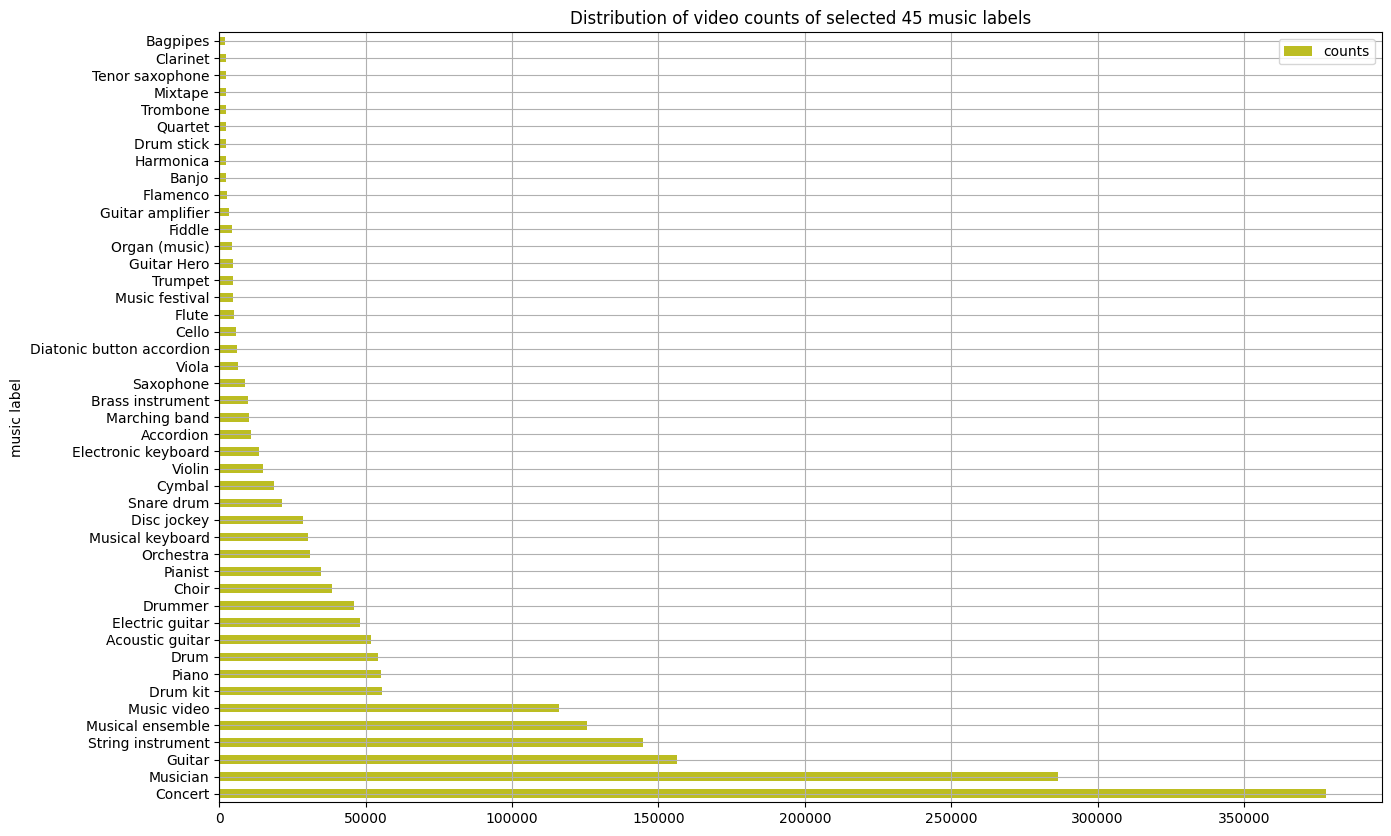

In [35]:
counts = list()
for label in music_labels:
    try:
        counts.append(vocab_df[vocab_df['Name'] == label].iloc[0]['TrainVideoCount'])
    except:
        print(label)
music_label_counts = pd.DataFrame({'music label': music_labels, 'counts': counts})
music_label_counts.plot(kind='barh', x='music label', y='counts', figsize=(15, 10),
                        title=f'Distribution of video counts of selected {len(music_labels)} music labels', 
                        xlabel='music label', ylabel='# video counts', 
                        rot=0, grid='minor', color='tab:olive')
plt.show()